In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Generate process

Assumptions:
1. Slowly changing random long term demand (events rate)
2. Slowly changing random long term demand deviation
3. Non-negative observations
Proposition of random variable properties:
1. Poisson distibution (https://oboloo.com/blog/distribution-of-poisson-analyzing-random-variables-in-procurement/)
 - https://en.wikipedia.org/wiki/Poisson_distribution
 - note that the process variance is equal to is expected value.

  ![poisson_PL](figs/poisson_PL.png)

2. Rayleigh - 

Optional:
1. Slowly changing random demad upper cap.
 - could be several independent interleaved processed each with it's own parameters
2. impulse noise - outliers

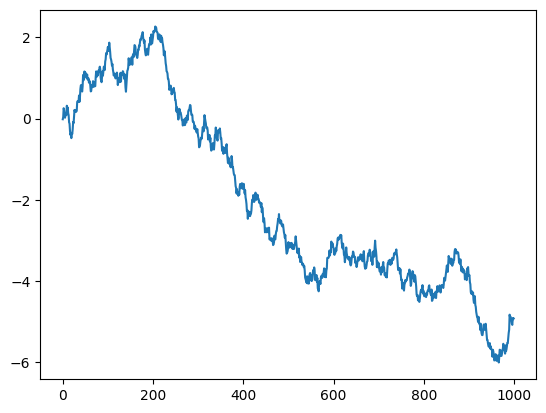

In [3]:
# cumulative sum of normal random variable

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

process = np.cumsum(s)

plt.plot(process)

(0.0, 783.1)

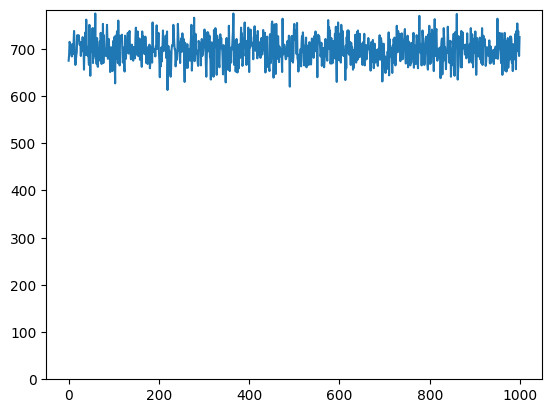

In [4]:
# Poisson distribution
# 1. constant events rate and constant time span
# 2. constant events rate and random time span (non-negative)
# 3. slowly changing events rate and random time span (non-negative)
# 4. additional outliers

rho_0 = 100 # ten units per day
dT = 7 # seven days between events

s = np.random.poisson(rho_0*dT, 1000)
plt.plot(s)
bottom, top = plt.ylim()  # return the current ylim
plt.ylim(0, top)

C:\Users\Marek\AppData\Local\Temp\ipykernel_42760\2818681864.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[n] = np.random.poisson(rho_0*(2*dT), 1)
C:\Users\Marek\AppData\Local\Temp\ipykernel_42760\2818681864.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[n] = np.random.poisson(rho_0*dT, 1)


(0.0, 1548.55)

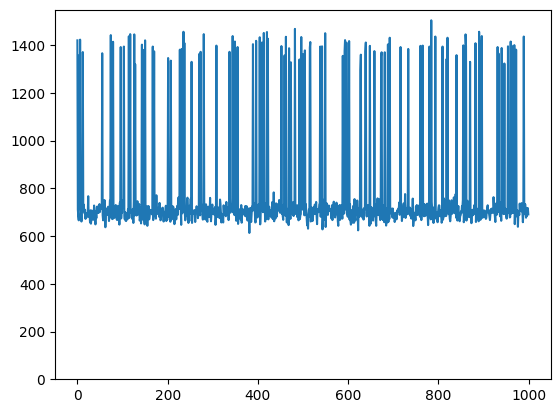

In [5]:
rho_0 = 100 # ten units per day
dT = 7 # seven days between events

N = 1000
s = np.zeros(N,)
for n in range(N):
    # TODO use binomial or other distribution for additional delay between events
    # TODO random event skipping
    # TODO random additional events
    # TODO rho_0 random drift 
    # TODO use parameters (direct or indirect) of a model as additional features if ML model allows
    
    if np.random.uniform() > 0.9:
        s[n] = np.random.poisson(rho_0*(2*dT), 1)
    else:
        s[n] = np.random.poisson(rho_0*dT, 1)

plt.plot(s)
bottom, top = plt.ylim()  # return the current ylim
plt.ylim(0, top)

C:\Users\Marek\AppData\Local\Temp\ipykernel_42760\1015026545.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[n] = np.random.poisson(rho_0*dT, 1)
C:\Users\Marek\AppData\Local\Temp\ipykernel_42760\1015026545.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[n] = np.random.poisson(rho_0*(2*dT), 1)


(0.0, 173.3)

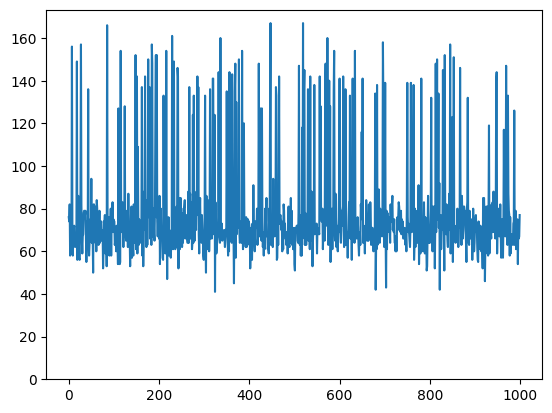

In [15]:
rho_0 = 10 # units per day
dT = 7 # seven days between events

N = 1000
s = np.zeros(N,)
for n in range(N):
    # TODO use binomial or other distribution for additional delay between events
    # TODO random event skipping
    # TODO random remaining capacity limit
    # TODO random additional events
    # TODO rho_0 random drift 
    # TODO use parameters (direct or indirect) of a model as additional features if ML model allows
    
    if np.random.uniform() > 0.9:
        s[n] = np.random.poisson(rho_0*(2*dT), 1)
    else:
        s[n] = np.random.poisson(rho_0*dT, 1)

plt.plot(s)
bottom, top = plt.ylim()  # return the current ylim
plt.ylim(0, top)

[84.88229357 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357
 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357
 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357
 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357
 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357 84.88229357]
[10.33333333 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333
 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333
 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333
 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333
 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333]


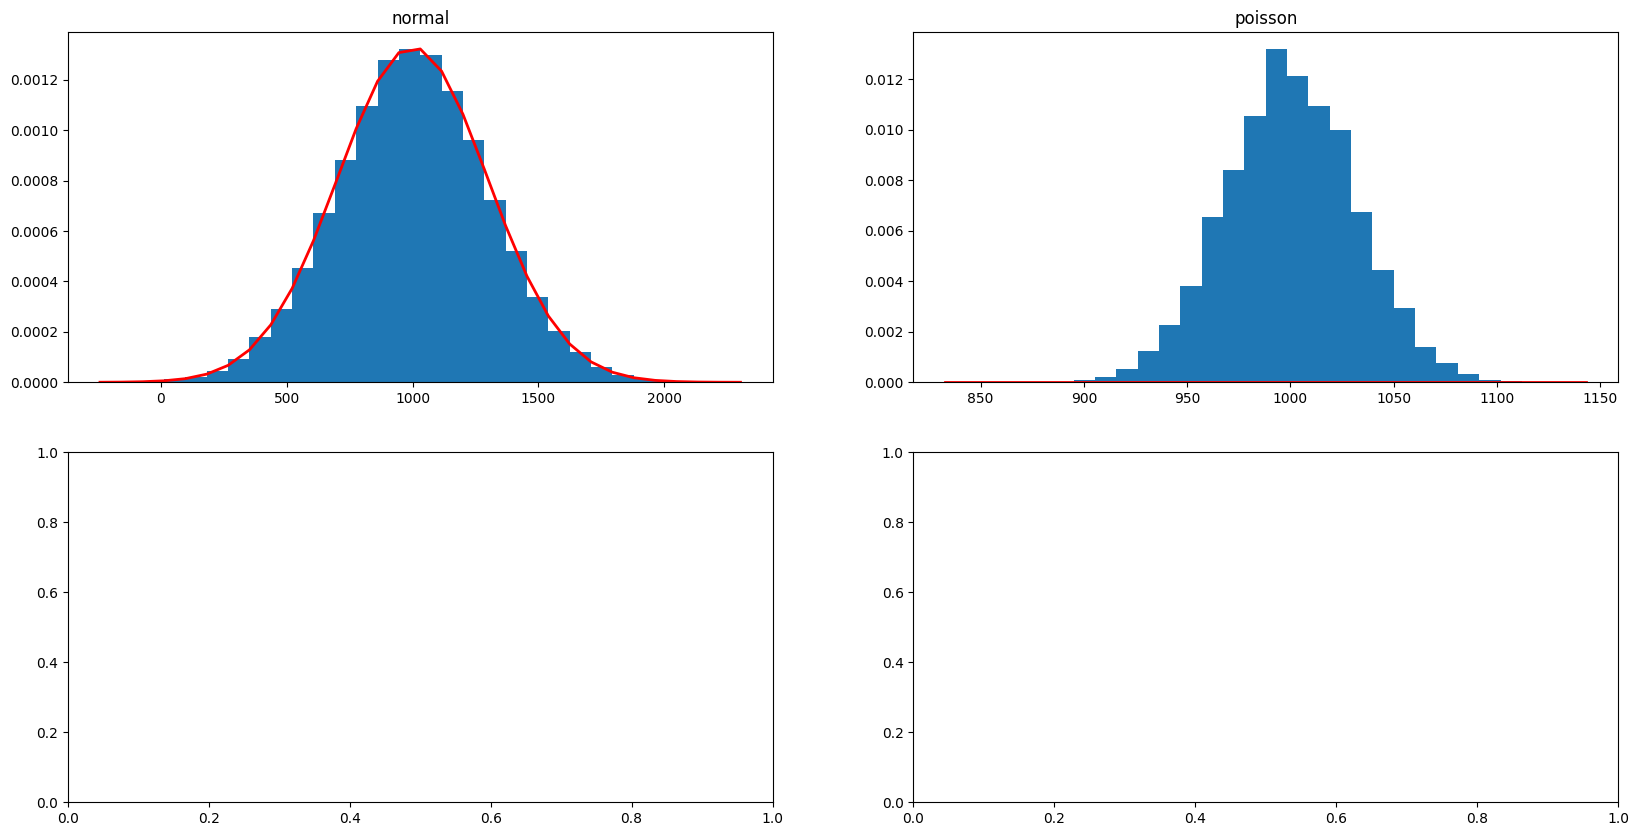

In [54]:
import matplotlib.pyplot as plt
from functools import partial
from scipy.stats import norm, poisson

def normal_pdf_fn(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

def poisson_pdf_fn(x, rate):
    # NOTE: "approximation" based on probability mass function
    dx = np.mean(np.diff(x))
    poisson_pdf = np.zeros_like(x)
    for n, x_n in enumerate(x):
        k_range = np.arange(np.floor(x[n]-dx/2), np.ceil(x[n]+dx/2))
        # TODO: simulate pdf scaling
        poisson_pdf[n] = np.sum(poisson.pmf(k = k_range, mu = rate)) # /len(k_range)
    return poisson_pdf

def plot_dist(ax, noise_vector, noise_pdf_fn, title):
    count, bins, _ = ax.hist(noise_vector, 30, density=True)
    print(np.diff(bins))
    ax.plot(bins, noise_pdf_fn(bins),
            linewidth=2, color='r')
    ax.set_title(title)


rng = np.random.default_rng()

# Draw distributions
N = 100_000

# normal
mu = 1000 # average weekly events rate
sigma = 300 # standard devaiation
# poisson
dT = 7
rate = mu / dT

# np.random.Generator.normal
n_normal = rng.normal(loc = mu, scale = sigma, size = N)
# np.random.Generator.poisson
n_poisson = rng.poisson(lam= rate*dT, size = N)

fig = plt.figure(figsize=(20,10))
axs = fig.subplots(2,2)

plot_dist(axs[0,0], n_normal, partial(normal_pdf_fn, mu=mu, sigma=sigma), title = "normal")
plot_dist(axs[0,1], n_poisson, partial(poisson_pdf_fn, rate=rate), title = "poisson")

# print(poisson.pmf(np.arange(1,1100, 100), mu=rate))
# print(np.arange(1,1100, 100))
# axs[1,0].plot(poisson.pmf(k=np.arange(1,1100, 100), mu=rate/100))

plt.show()

In [ ]:
# Generate random events rates
# NOTE: using Poisson distribution 
# 1. 

## CONCEPTS TO TEST
1. Compare direct use of target versus use of averaged target (with compensated delay)

In [13]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex 

In [8]:
from  pprint import pprint

x = __
pprint(dir(x))

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']


In [9]:
print(x._lsmagic())

AttributeError: 'tuple' object has no attribute '_lsmagic'